In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [21]:
frame_num = 0
bins = 1
file_path = r'C:\Users\zhang\Desktop\md\2024corning\April\old_file\0429ana\18cry_300k_out.xyz'
creat_new_frame = 0

In [22]:
dic_m = {'Si':28.084,'Al':26.982,'O':15.999,'Li':6.938,'Ti':47.867}

In [23]:
#读取文本函数，返回直接d选帧
def get_data(path,frame_num):
    with open(path) as f:
        str_data = f.read()
    data = str_data.split()
    ###选帧#########
    #此处写个程序选帧
    atoms_num = int(data[0])
    frame_len = atoms_num*4+2
    data_len =len(data)
    max_frame = data_len // frame_len
    
    temp = []
    temp = data[frame_len*frame_num:frame_len*(frame_num+1)]

    #暂时先自行处理了表头
    temp = temp[2:]
    frame_list = []
    for i in range(atoms_num):
        frame_list.append([temp[i*4+0],float(temp[i*4+1]),float(temp[i*4+2]),float(temp[i*4+3])])
    
    return frame_list

In [24]:
data = get_data(file_path,frame_num=0)

# 主函数

In [25]:
# 得到最大的xyz值
max_x,max_y,max_z = 0,0,0
for i in data:
    if i[1]>max_x:
        max_x = i[1]
    if i[2]>max_y:
        max_y = i[1]
    if i[3]>max_z:
        max_z = i[3]
print(max_x,max_y,max_z)
num_bins = math.ceil(max_x/bins)
print('max x: '+ str(max_x))
print('num_bin: ' +  str(num_bins))

96.787534 89.980534 12.08413
max x: 96.787534
num_bin: 97


In [26]:
list_m = np.zeros(num_bins)
# 开始计算每个位置的数量
for atom in data:
    i_x,i_ele = atom[1],atom[0]
    pos = int(i_x/bins)
    list_m[pos]+= dic_m[i_ele]
x_list = np.linspace(0, bins*(num_bins-1), num_bins)

In [33]:
list_m[1]

1149.7170000000008

In [27]:
bins*num_bins

97

In [28]:
max_x

96.787534

In [34]:
# 然后开始计算体积和密度
list_density = np.zeros(num_bins)
bin_v = bins*max_y*max_z
last_v = abs(bins*num_bins-max_x)*max_y*max_z
# 最后一个区域稍微处理一下
for i in range(num_bins-1):
    list_density[i] = list_m[i]/bin_v+1
list_density[-1] = list_density[-2]

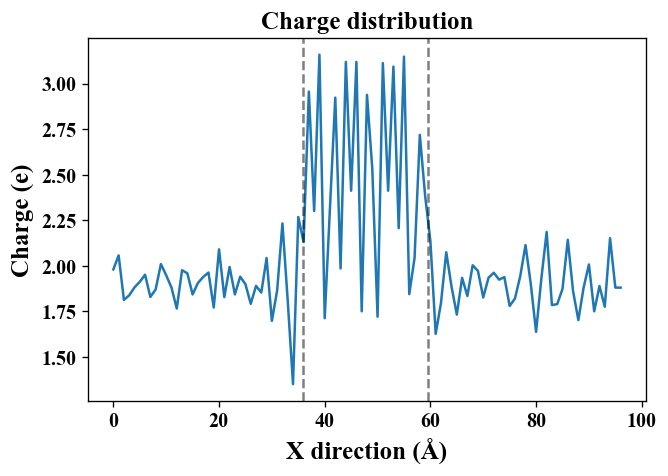

In [36]:
# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
# 创建一个图形并设置清晰度
plt.figure(dpi=120) # ,figsize=(8, 6)
plt.plot(x_list,list_density)
# 
# 设置X轴和Y轴的刻度值的字体为黑体和字体大小
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('Charge distribution' , fontsize=15, fontweight='bold')
plt.ylabel('Charge (e)' , fontsize=15, fontweight='bold')
plt.xlabel('X direction (Å)' , fontsize=15, fontweight='bold')

# 添加y=0的刻度线
#plt.axhline(y=0, color='red', linestyle='--')
# 添加x的刻度线
plt.axvline(x=35.9, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=59.5, color='black', linestyle='--', alpha=0.5)

In [12]:
new_name = r'C:\Users\zhang\Desktop\frame_ana_cry.xyz'
if(creat_new_frame==1):
    new_name = "C:\\Users\zhang\\Desktop\\"
    new_name += str(frame_num) + 'frame.xyz'

data = get_data(file_path,frame_num)

# 保存文件

In [ ]:
#看文件是否存在 存在也删了 都要重建
if not os.path.exists(new_name):
    os.system(r'touch {}'.format(new_name))
else:
    os.remove(new_name)
    os.system(r'touch {}'.format(new_name))

In [ ]:
#先把文件头写上去
with open(new_name,'a') as file:
        file.write("{} \n".format(6200))
        file.write("{} \n".format("Atoms"))

#如果cry标志位为1  那么写入的原子name为Ag
with open(new_name,'a') as file:
    for i in copy_list_nbnb:
        if(i.cry==1):
            file.write("{}    {}    {}    {}\n".format("Ag",i.x,i.y,i.z))
        else:
            file.write("{}    {}    {}    {}\n".format(i.name,i.x,i.y,i.z))
#再写入其他原子
with open(new_name,'a') as file:
    for i in o_list:
        file.write("{}    {}    {}    {}\n".format(i.name,i.x,i.y,i.z))
    for i in si_list:
        file.write("{}    {}    {}    {}\n".format(i.name,i.x,i.y,i.z))
    for i in li_list:
        file.write("{}    {}    {}    {}\n".format(i.name,i.x,i.y,i.z))